In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
historical_trends = pd.read_excel("Historical_Trends.xlsx")
claims = pd.read_excel("2021_22_Claims.xlsx")

In [5]:
historical_trends.head()

,Year,Market,Type of Service,Unit Cost,Utilization
0,2020,LG-1,IP,-0.038976,0.124111
1,2020,LG-1,OP,-0.028813,0.087854
2,2020,LG-1,Prof,-0.410468,1.132620
3,2020,LG-1,Ancillary,-0.018955,0.035607
4,2020,LG-1,Generic,0.046367,0.020978


In [6]:
claims.head()

,Yearmo,Market,Benefit Category,Member Months,Utilization,Allowed
0,202101,Individual,Ancillary,691280.524146,3.254088e+05,2.243792e+07
1,202101,Individual,IP,691280.524146,1.528733e+04,1.088484e+08
2,202101,Individual,OP,691280.524146,2.920820e+05,9.729413e+07
3,202101,Individual,Prof,691280.524146,1.023329e+06,9.139302e+07
4,202102,Individual,Ancillary,700569.581401,3.113756e+05,2.204930e+07


In [7]:
lg1_IP = historical_trends[(historical_trends['Market'] == "LG-1") & 
                           (historical_trends['Type of Service'] == 'IP')].sort_values(by = "Year").reset_index(drop = True)
lg1_IP

,Year,Market,Type of Service,Unit Cost,Utilization
0,2014,LG-1,IP,0.004363,0.092298
1,2015,LG-1,IP,0.014596,0.089225
2,2016,LG-1,IP,0.018085,0.022823
3,2017,LG-1,IP,0.018747,0.056545
4,2018,LG-1,IP,0.071615,0.118901
5,2019,LG-1,IP,0.123609,-0.067228
6,2020,LG-1,IP,-0.038976,0.124111


In [42]:
def trends_filter(market, service):
    return historical_trends[(historical_trends.Market == market) & 
                             (historical_trends['Type of Service'] == service)].sort_values(by = "Year").reset_index(drop = True)

In [103]:
def simple_plot(df, y, exclude_year = None, year_range = np.arange(2014, 2023, 1, dtype = int)):
    
    if type(exclude_year) == list:
        for i in exclude_year:
            df = df[df.Year != i]
    elif type(exclude_year) == int:
        df = df[df.Year != exclude_year]
    
    
    market = df.loc[0, 'Market']
    service = df.loc[0, "Type of Service"]
    
    title = f"Trend for {service} in {market}."
    xlabel = "Year"
    ylabel = y
    
    plt.figure(figsize = (8, 5))
    scatter = sns.scatterplot(x = "Year", y = y, data = df, s = 50)
    scatter.set(title = title, xlabel = xlabel, ylabel = ylabel)
    scatter.set_xticks(year_range)
    
    x = df['Year'].values.reshape(-1, 1)
    y = df[y].values
    model = LinearRegression().fit(x, y)
    plt.plot(year_range, model.predict(year_range.reshape(-1, 1)), color = 'black', alpha = 0.6)
    r_2 = r2_score(y, model.predict(x))

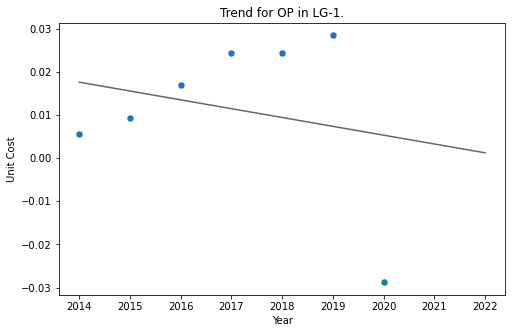

In [107]:
simple_plot(trends_filter('LG-1', 'OP'), "Unit Cost", exclude_year = None)

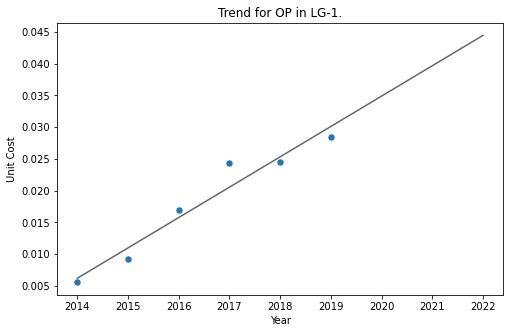

In [108]:
simple_plot(trends_filter('LG-1', 'OP'), "Unit Cost", exclude_year = 2020)

<ipython-input-103-ebd18aba03a5>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (8, 5))


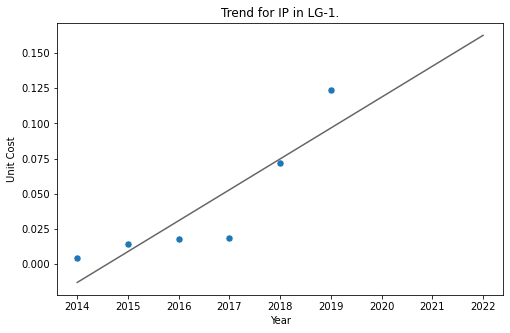

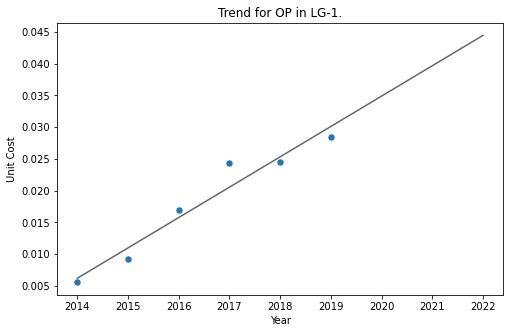

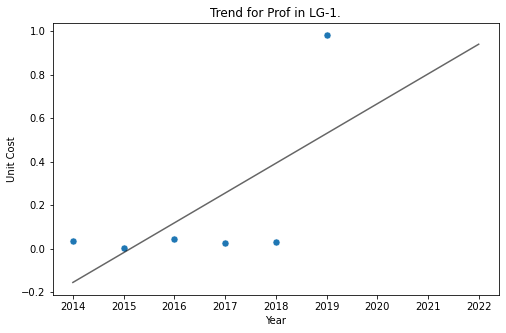

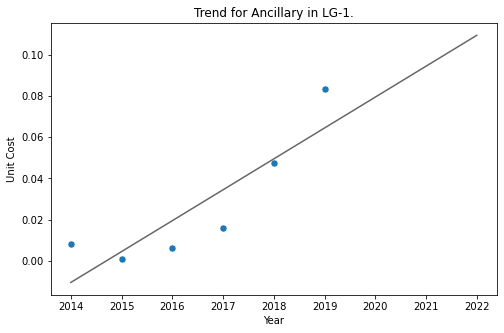

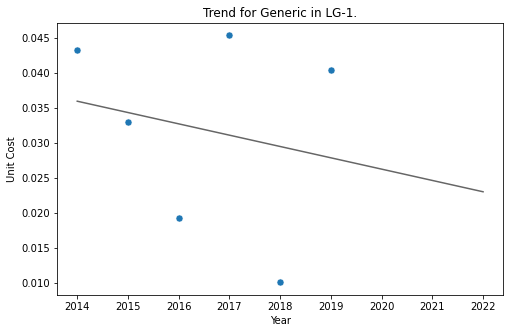

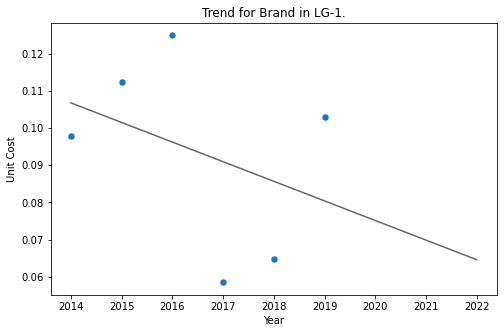

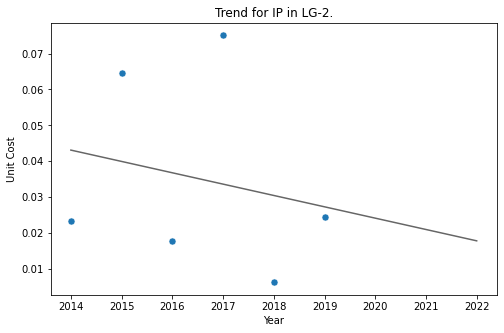

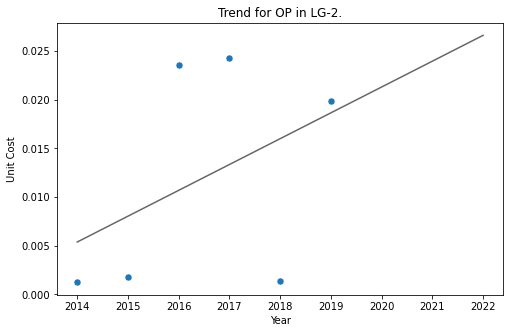

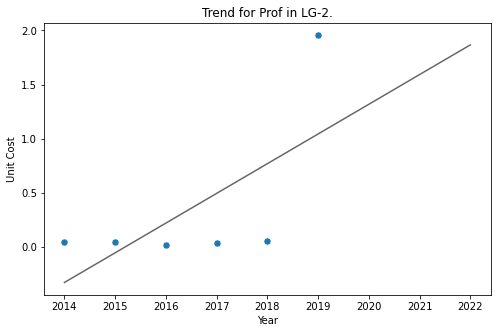

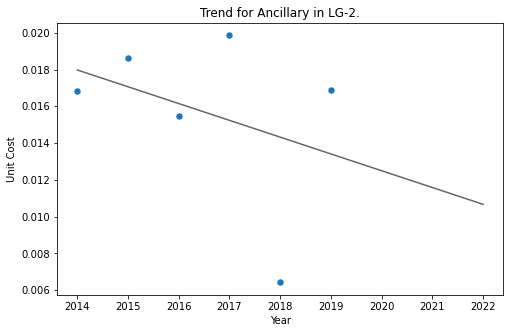

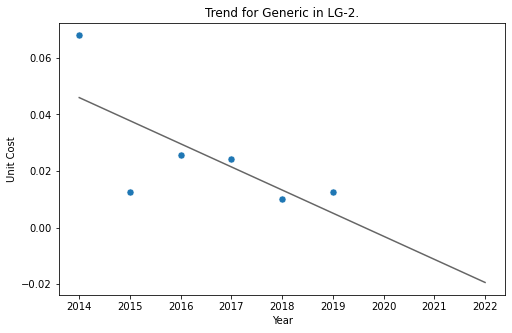

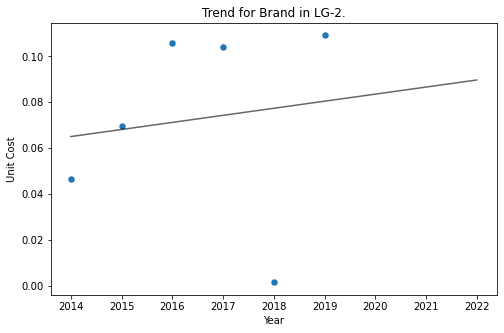

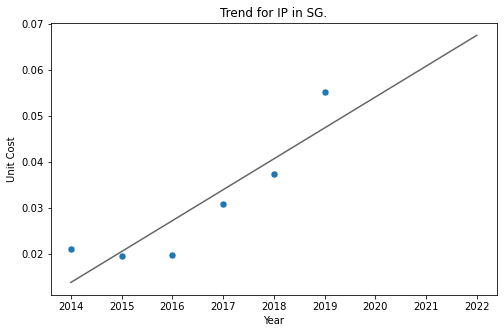

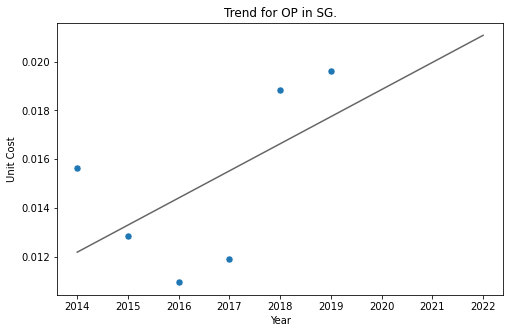

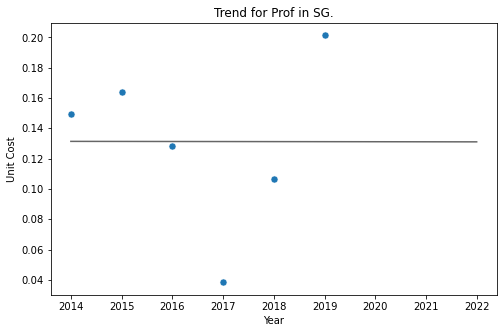

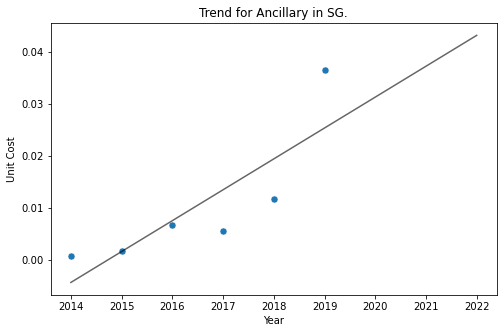

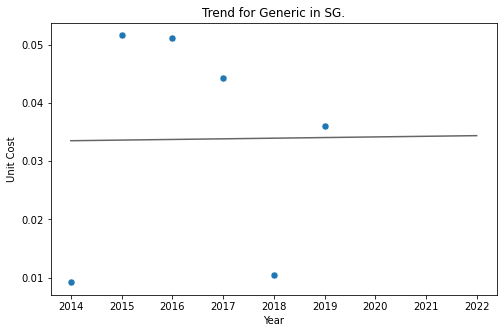

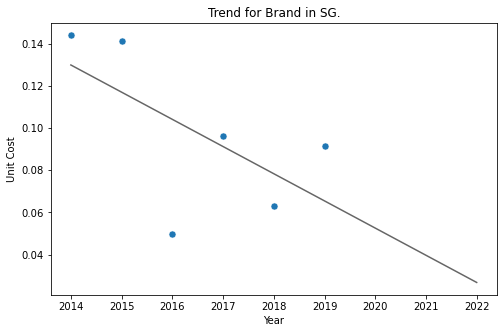

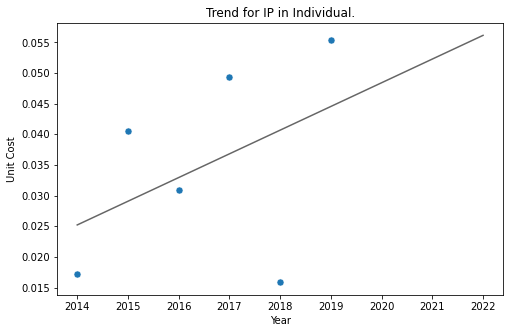

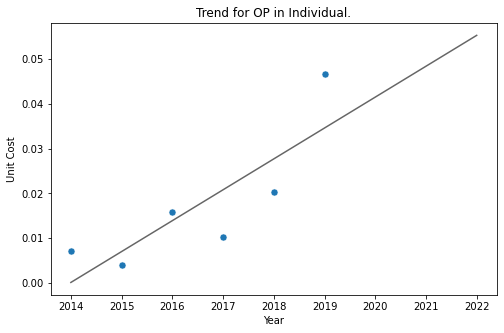

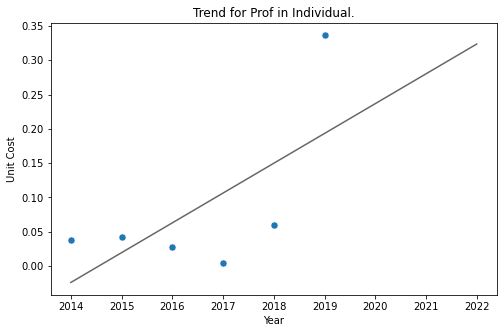

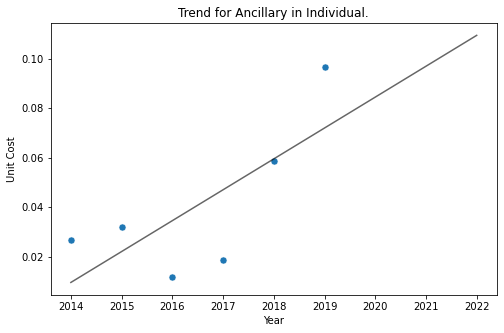

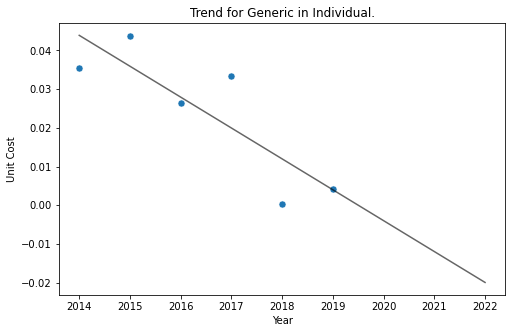

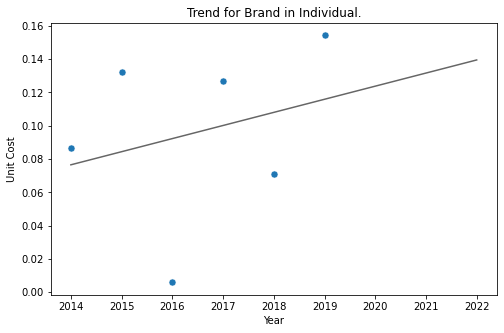

In [106]:
markets = ["LG-1", 'LG-2', 'SG', 'Individual']
services = ['IP', 'OP', 'Prof', 'Ancillary', 'Generic', 'Brand']

for i in markets:
    for j in services:
        simple_plot(trends_filter(i, j), "Unit Cost", exclude_year = 2020)